<center><h1><b><span style="color:blue">Exercises</span></b></h1></center>
<center><h2><b>Particles, decays, HEP units</b></h2></center>

&nbsp;<br>
### Suggestions of exercises with the following packages
- `hepunits` - the HEP system of units.
- `Particle` - PDG particle data, MC identification codes, and more.
- `DecayLanguage` - Decay files, universal description of decay chains.

&nbsp;<br>
### Exercise 1 - `Particle`

Try and produce the following tables of B-mesons displayed side-by-side in the notebook:

<center><img src="images/exercise_06_table_b_mesons.png" width="60%"/></center>

#### Hints:
- These particles are all available in the `Particle` package,  which provides particle names in HTML.
- The package `tabulate` provides powerful and pretty prints of tabular data.
- HTML can trivially be displayed in notebooks with the function HTML available from `IPython.display import HTML`.

&nbsp;<br>
### Exercise 2 - `Particle`

Explore the command line searches the package provides ... OK, not the natural thing to do inside a notebook, but let's try it for the sake of showing what is available ;-).

#### Hints:
- You can run on the prompt with `!python`.
- Hence try `!python -m particle --help` and explore what is available.

&nbsp;<br>
### Exercise 3 - `DecayLanguage`

**Feeling nostalgic of an $e^+ e^-$ example?** Try out the following:

In [1]:
from decaylanguage import DecFileParser, DecayChainViewer

s = """
Alias B0sig       B0
Alias anti-B0sig  anti-B0

Define dm 0.507e12
Define PKHplus  0.159
Define PKHzero  0.775
Define PKHminus 0.612
Define PKphHplus  1.563
Define PKphHzero  0.0
Define PKphHminus 2.712

Decay Upsilon(4S)
0.483122645 B0sig    anti-B0sig   VSS_BMIX dm;
Enddecay

Decay B0sig
0.001330000 J/psi   K*0       SVV_HELAMP PKHplus PKphHplus PKHzero PKphHzero PKHminus PKphHminus;
Enddecay

Decay anti-B0sig
0.000024000 D_s-    pi+    PHSP;
Enddecay

Decay J/psi
0.0593 mu+     mu-   PHOTOS   VLL;
Enddecay

Decay K*0
0.6657      K+  pi-         VSS;
0.3323      K0  pi0         VSS;
0.0020      K0  gamma       VSP_PWAVE;
Enddecay

Decay D_s-
0.001200000 K_S0    pi-   PHSP;
Enddecay

Decay K_S0
0.69 pi+     pi-     PHSP;
0.31 pi0     pi0     PHSP;
Enddecay
"""

dfp = DecFileParser.from_string(s)
dfp.parse()
dfp

<DecFileParser: decfile(s)=<dec file input as a string>, n_decays=7>

You could use YAML to look at the decay chain if you find `dict`s too difficult to read with the eye:

In [2]:
dc = dfp.build_decay_chains('Upsilon(4S)')

import yaml
print(yaml.dump(dc))

Upsilon(4S):
- bf: 0.483122645
  fs:
  - B0sig:
    - bf: 0.00133
      fs:
      - J/psi:
        - bf: 0.0593
          fs:
          - mu+
          - mu-
          model: VLL
          model_params: ''
      - K*0:
        - bf: 0.6657
          fs:
          - K+
          - pi-
          model: VSS
          model_params: ''
        - bf: 0.3323
          fs:
          - K0
          - pi0
          model: VSS
          model_params: ''
        - bf: 0.002
          fs:
          - K0
          - gamma
          model: VSP_PWAVE
          model_params: ''
      model: SVV_HELAMP
      model_params:
      - 0.159
      - 1.563
      - 0.775
      - 0.0
      - 0.612
      - 2.712
  - anti-B0sig:
    - bf: 2.4e-05
      fs:
      - D_s-:
        - bf: 0.0012
          fs:
          - K_S0:
            - bf: 0.69
              fs:
              - pi+
              - pi-
              model: PHSP
              model_params: ''
            - bf: 0.31
              fs:
              - 

And now view the decay with `DecayChainViewer` ...

&nbsp;<br>
### Exercise 4 - `hepunits`

Did you enjoy the little study on the time-of-flight of pions, kaons and protons? Then investigate an example more relevant to LHCb - detector timing resolution requirement is getting tough!

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from particle.particle.literals import proton, pi_plus, K_plus  # particle name literals
from hepunits import c_light, GeV, meter, ps, ns

def ToF(m, p, L):
    """Time-of-Flight = particle path length L / (c * beta)"""
    # No c factors here because physicists give m and p without them, hence the c's cancel out, effectively ;-).
    one_over_beta = np.sqrt(1 + m*m/(p*p))
    return (L * one_over_beta /c_light)

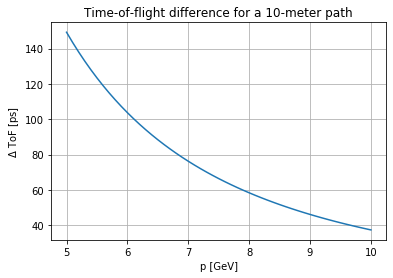

In [4]:
p = np.arange(5., 10.1, 0.1) * GeV
delta = ( ToF(K_plus.mass, p, 10*meter) - ToF(pi_plus.mass, p, 10*meter) ) / ps

fig, ax = plt.subplots()
ax.plot(p/GeV, delta)

ax.set(xlabel='p [GeV]', ylabel='$\Delta$ ToF [ps]',
       title='Time-of-flight difference for a 10-meter path')
ax.grid()

plt.show()

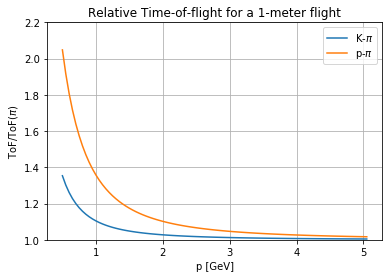

In [5]:
p = np.arange(0.5, 5.1, 0.05) * GeV
s1 = ( ToF(K_plus.mass, p, 1.38*meter) / ToF(pi_plus.mass, p, 1.38*meter) )
s3 = ( ToF(proton.mass, p, 1.38*meter) / ToF(pi_plus.mass, p, 1.38*meter) )

fig, ax = plt.subplots()
ax.plot(p/GeV, s1, label='K-$\pi$')
ax.plot(p/GeV, s3, label='p-$\pi$')

ax.set(xlabel='p [GeV]', ylabel='ToF/ToF($\pi$)',
       title='Relative Time-of-flight for a 1-meter flight')
ax.grid()

plt.ylim(bottom=1, top=2.2)
plt.legend()
plt.show()